In [142]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('../src')
os.chdir('../src')

import torch
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as idp
from audio_descriptors.features import compute_all


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
from raving_fader.datasets.attr_dataset import get_dataset_attr


def plot_features(features,descriptors,features_2=None):
    f,axs = plt.subplots(1,5,figsize=(20,5))
    for i,ax in enumerate(axs):
        ax.plot(features[i],label="Original")
        
        if features_2 is not None:
            ax.plot(features_2[i],label="Modified")
        # ax.set_ylim(-1,1)
        ax.set_title(descriptors[i])
        ax.legend()
        
def normalize(features):
    features=features
    if len(features.shape())==3:
        for i in range(features.shape[1]):
            features[:,i] = 2* (   (features[:,i] - np.min(features[:,i])) / (np.max(features[:,i]) - np.min(features[:,i])) -0.5 ) 
    return(features)

def get_features(audio,descriptors,sr):
    feat = compute_all(audio,sr=sr,descriptors=descriptors,
                                            mean=False,
                                            resample=latent_length)
    
    feat = {descr: feat[descr] for descr in descriptors}
    feat = np.array(list(feat.values())).astype(np.float32)
    return(torch.tensor(feat))

In [152]:
datasets_path = "/data/nils/datasets/"
descriptors = ["centroid","rms","bandwidth","sharpness","booming"]

datasets = ["DK","NSS","JPN","VLN"]
sr = [48000,16000,48000,44100]

n_signal = 65536
latent_length=64
nb_bins = 16

In [157]:
datasets = ["DK"]
sr = [48000]

In [161]:
len(dataset)*0.05

929.8000000000001

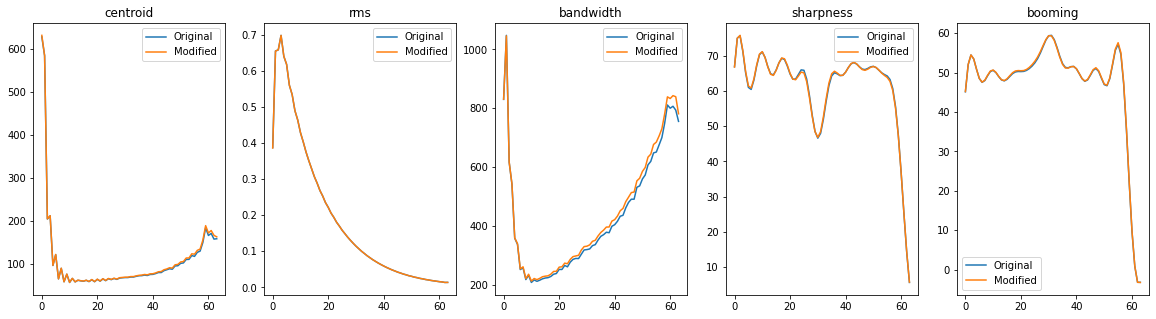

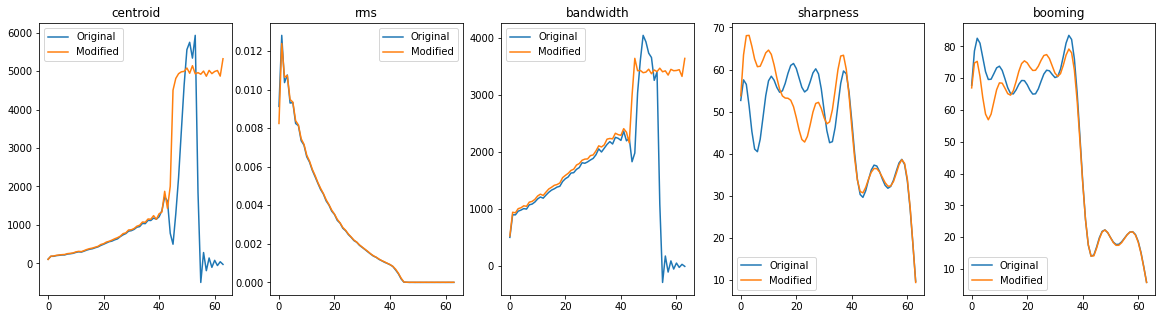

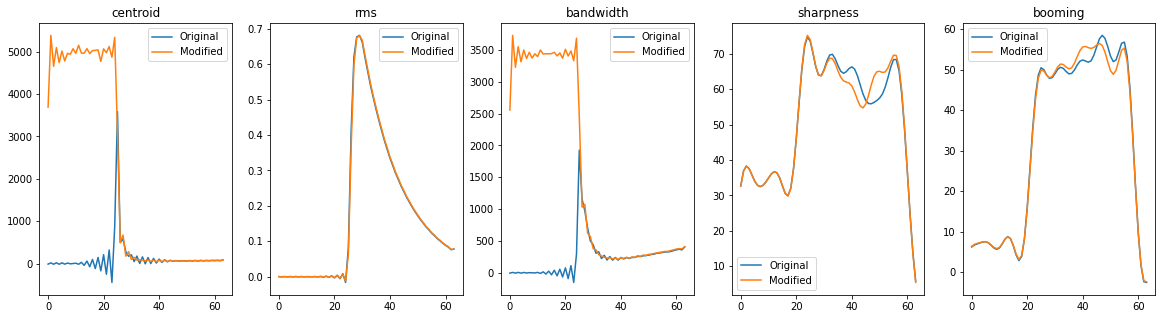

In [159]:
for dataset,sr in zip(datasets,sr):

    dataset_dir = os.path.join(datasets_path,dataset)

    feat_path = os.path.join(dataset_dir,"features.pth")
    wav_path = os.path.join(dataset_dir,"audio")
    mdb_path = os.path.join(dataset_dir,"data.mdb")

    features = torch.load(feat_path)
    
    dataset = get_dataset_attr(dataset_dir, [''], sr, n_signal, descriptors,
                         latent_length,nb_bins,all_features,r_samples=None)
    
    for i in range(3):
        audio,feat = dataset.__getitem__(i)
        features_2 = get_features(audio,descriptors,sr)

        plot_features(features[i],descriptors,features_2)
        plt.show()
        idp.display(idp.Audio(audio,rate=sr))

In [162]:
a = {"a":[0],"b":[0]}

In [165]:
for x in a.items():
    print(x)

('a', [0])
('b', [0])
